### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,power_transform


### Importing the test and train dataset

In [3]:
tr_data  = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
ts_data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
print(tr_data.shape,ts_data.shape)

(8523, 12) (5681, 11)


#### Checking for null data

In [4]:
tr_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Imputing null data with median as the data isn't normally distributed

In [5]:
tr_data['Item_Weight'] = tr_data['Item_Weight'].fillna(tr_data['Item_Weight'].median())

In [6]:
tr_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

#### Imputing the outlet size with mode

In [7]:
tr_data['Outlet_Size'] = tr_data['Outlet_Size'].fillna(tr_data['Outlet_Size'].mode()[0])

<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

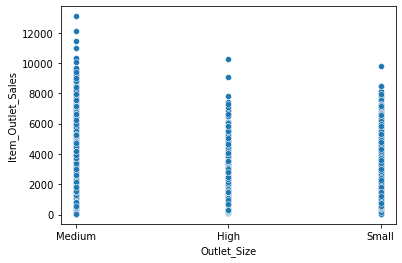

In [8]:
import seaborn as sns
sns.scatterplot(x='Outlet_Size',y = 'Item_Outlet_Sales', data = tr_data)

#### Mediun outlet size has better sales than high and small

<AxesSubplot:xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>

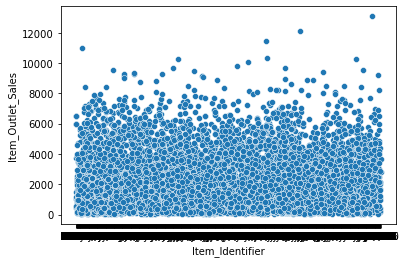

In [9]:
sns.scatterplot(x='Item_Identifier',y = 'Item_Outlet_Sales', data = tr_data)

#### There is no relation between the Iten identifier and the item outlet sales, hence dropping the same


In [10]:
tr_data = tr_data.drop(columns = 'Item_Identifier')

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

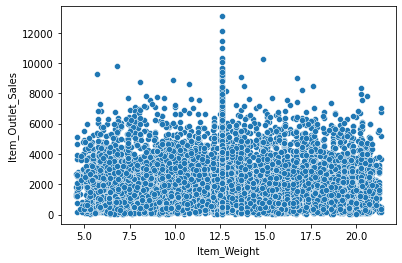

In [11]:
sns.scatterplot(x='Item_Weight',y = 'Item_Outlet_Sales', data = tr_data)

#### No visible relation between the item weight and item sales

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

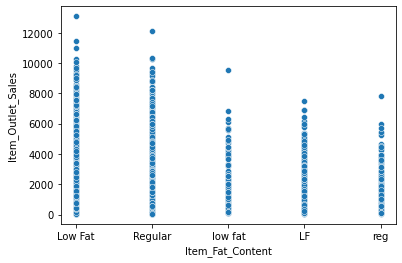

In [12]:
sns.scatterplot(x='Item_Fat_Content',y = 'Item_Outlet_Sales', data = tr_data)


there are multiple columns with the same meaning like Low Fat, low fat and LF means the same, hence merging them

In [13]:
tr_data['Item_Fat_Content'] = np.where(tr_data['Item_Fat_Content'].isin(['low fat','LF']),'Low Fat',
                                      np.where(tr_data['Item_Fat_Content']== 'reg','Regular',tr_data['Item_Fat_Content']))

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

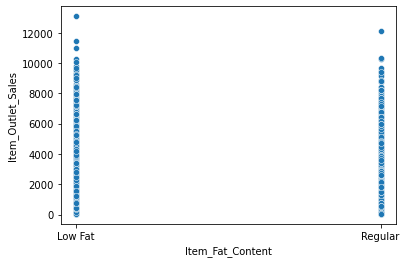

In [14]:
sns.scatterplot(x='Item_Fat_Content',y = 'Item_Outlet_Sales', data = tr_data)

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

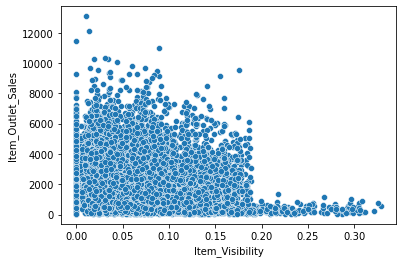

In [15]:
sns.scatterplot(x='Item_Visibility',y = 'Item_Outlet_Sales', data = tr_data)

No visible relationship between item visibility and sales

<AxesSubplot:xlabel='Item_Type', ylabel='Item_Outlet_Sales'>

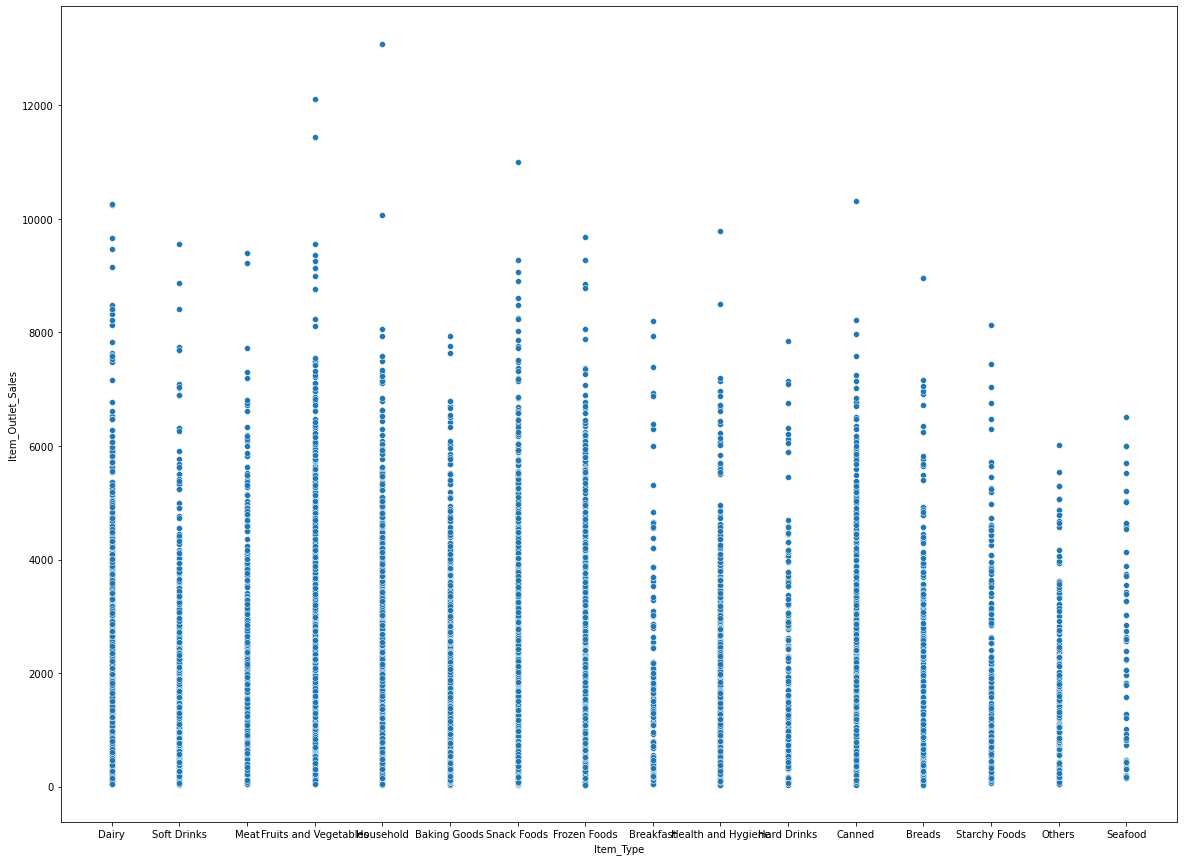

In [16]:
plt.figure(figsize = (20,15))
sns.scatterplot(x='Item_Type',y = 'Item_Outlet_Sales', data = tr_data)

In [17]:
tr_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

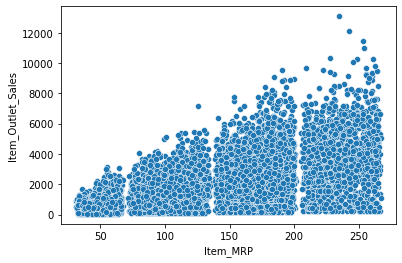

In [18]:
sns.scatterplot(x='Item_MRP',y = 'Item_Outlet_Sales', data = tr_data)

there is a positive relation ship between the MRP and sales

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

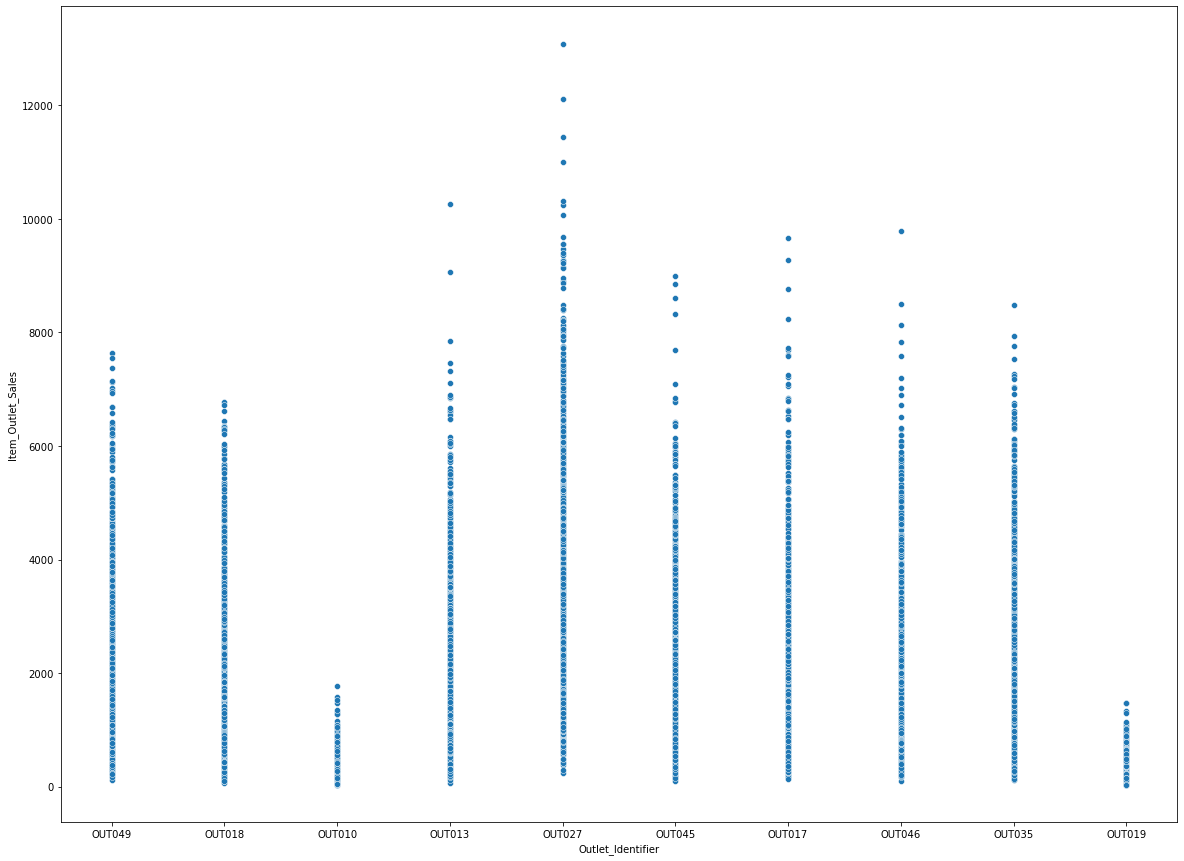

In [19]:
plt.figure(figsize = (20,15))
sns.scatterplot(x='Outlet_Identifier',y = 'Item_Outlet_Sales', data = tr_data)

<BarContainer object of 8523 artists>

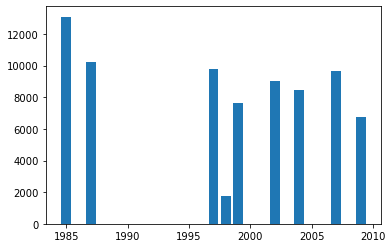

In [20]:
plt.bar(tr_data['Outlet_Establishment_Year'],tr_data['Item_Outlet_Sales'])

Minore relationship between the outlet established year and sales. the older the store the better the sales 

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

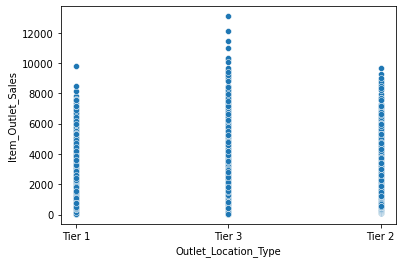

In [21]:
sns.scatterplot(x='Outlet_Location_Type',y = 'Item_Outlet_Sales', data = tr_data)


<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

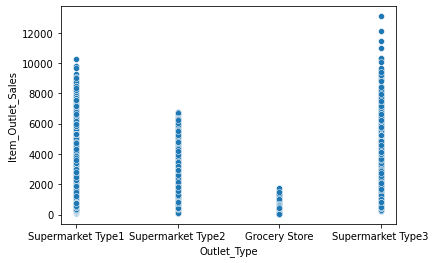

In [22]:
sns.scatterplot(x='Outlet_Type',y = 'Item_Outlet_Sales', data = tr_data)

In [23]:
tr_data['Outlet_Establishment_Year'] = tr_data['Outlet_Establishment_Year'].astype(str)

#### Encoding the categorical variables as per the data. below I'm encoding the outlet size using ordinal encoder

In [30]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder
orde = OrdinalEncoder(categories = [['Small','Medium','High']])
ord_data = orde.fit_transform(tr_data[['Outlet_Size']])
tr_data['Outlet_Size'] = ord_data

In [31]:
be =BinaryEncoder()

Using binary encode to encode other categorical data

In [32]:
en_data = be.fit_transform(tr_data[['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type']],)

In [33]:
train_data = pd.DataFrame(en_data)

##### I'm dropping the categorical variable and replacing with the same with the encoded data

In [34]:
tr_data = tr_data.drop(columns =['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type'])
train_data = pd.concat([tr_data,train_data],axis = 1)
train_corr =  train_data.corr()
train_corr['Item_Outlet_Sales'].sort_values(ascending = False)

Item_Outlet_Sales              1.000000
Item_MRP                       0.567574
Outlet_Type_0                  0.311192
Outlet_Identifier_1            0.233183
Outlet_Identifier_3            0.128529
Outlet_Location_Type_0         0.111287
Outlet_Establishment_Year_1    0.097637
Outlet_Size                    0.086182
Outlet_Establishment_Year_0    0.054821
Item_Type_2                    0.026824
Item_Type_4                    0.021672
Item_Fat_Content_0             0.018719
Item_Weight                    0.009693
Item_Type_0                    0.007380
Outlet_Establishment_Year_3   -0.005184
Item_Type_1                   -0.018475
Item_Fat_Content_1            -0.018719
Item_Type_3                   -0.032201
Outlet_Location_Type_1        -0.046376
Outlet_Identifier_0           -0.098403
Item_Visibility               -0.128625
Outlet_Establishment_Year_2   -0.146047
Outlet_Type_2                 -0.206633
Outlet_Identifier_2           -0.277444
Outlet_Type_1                 -0.350879


#### Checkin for correlation, where the column Item_MRP shows the highest positive correlation and the column Outlet_Establishment_Year_4 has the lowest correlation (close to 0)

<AxesSubplot:>

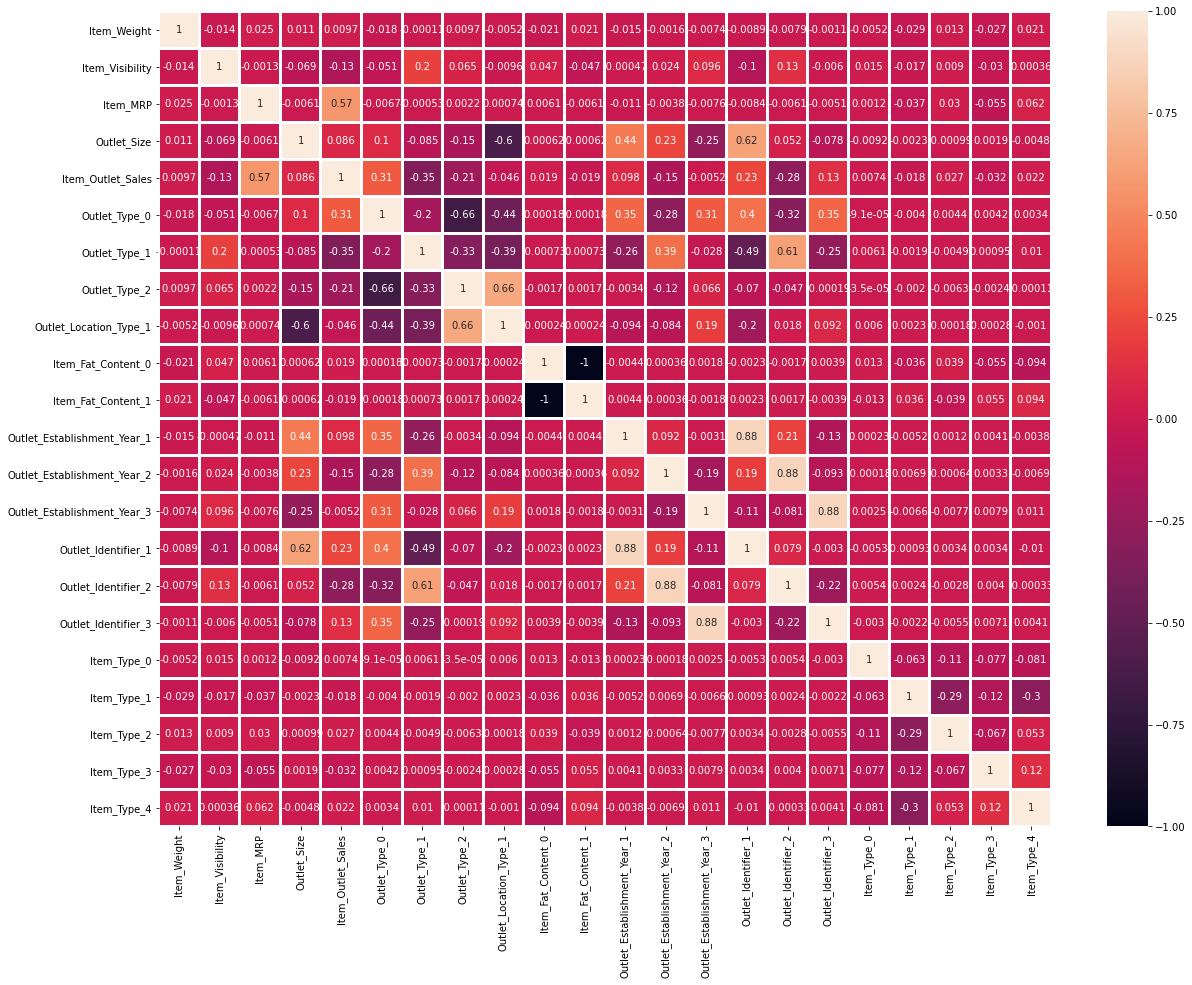

In [35]:
train_data = train_data.drop(columns =['Outlet_Location_Type_0','Outlet_Establishment_Year_0','Outlet_Identifier_0'])
train_corr =  train_data.corr()
plt.figure(figsize = (20,15))
sns.heatmap(train_corr, annot = True, linewidths=2)


#### There is no multi collinearity problem with the data


#### There is outlier with item_visibility column as per the below plot

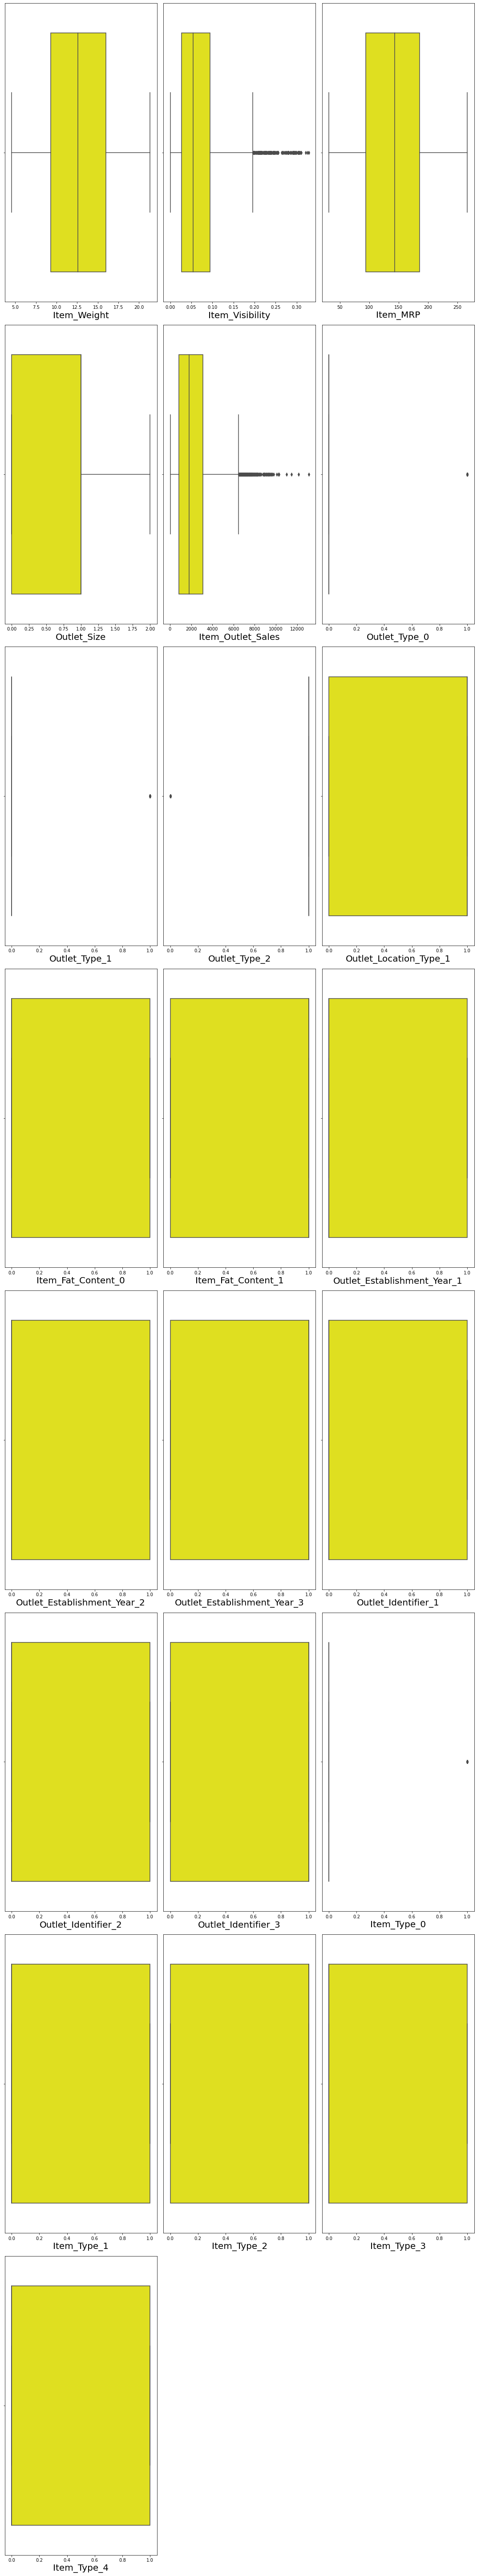

In [36]:
plt.figure(figsize = (15,90))
pltnum = 1

for i in train_data:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.boxplot(train_data[i],color = 'yellow', orient = 'v')
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()


In [37]:
from scipy.stats import zscore
z = np.abs(zscore(train_data[['Item_Visibility']]))
z

array([[0.97073217],
       [0.90811123],
       [0.95691733],
       ...,
       [0.59978449],
       [1.53287976],
       [0.41193591]])

In [38]:
#Removing the outlier using the z-score method. removing data with z-score greater than 3
ds_new = train_data[(z<3).all(axis =1)]
print(ds_new.shape)
print(train_data.shape)

(8428, 22)
(8523, 22)


In [39]:
(8428/8523)*100

98.88536900152528

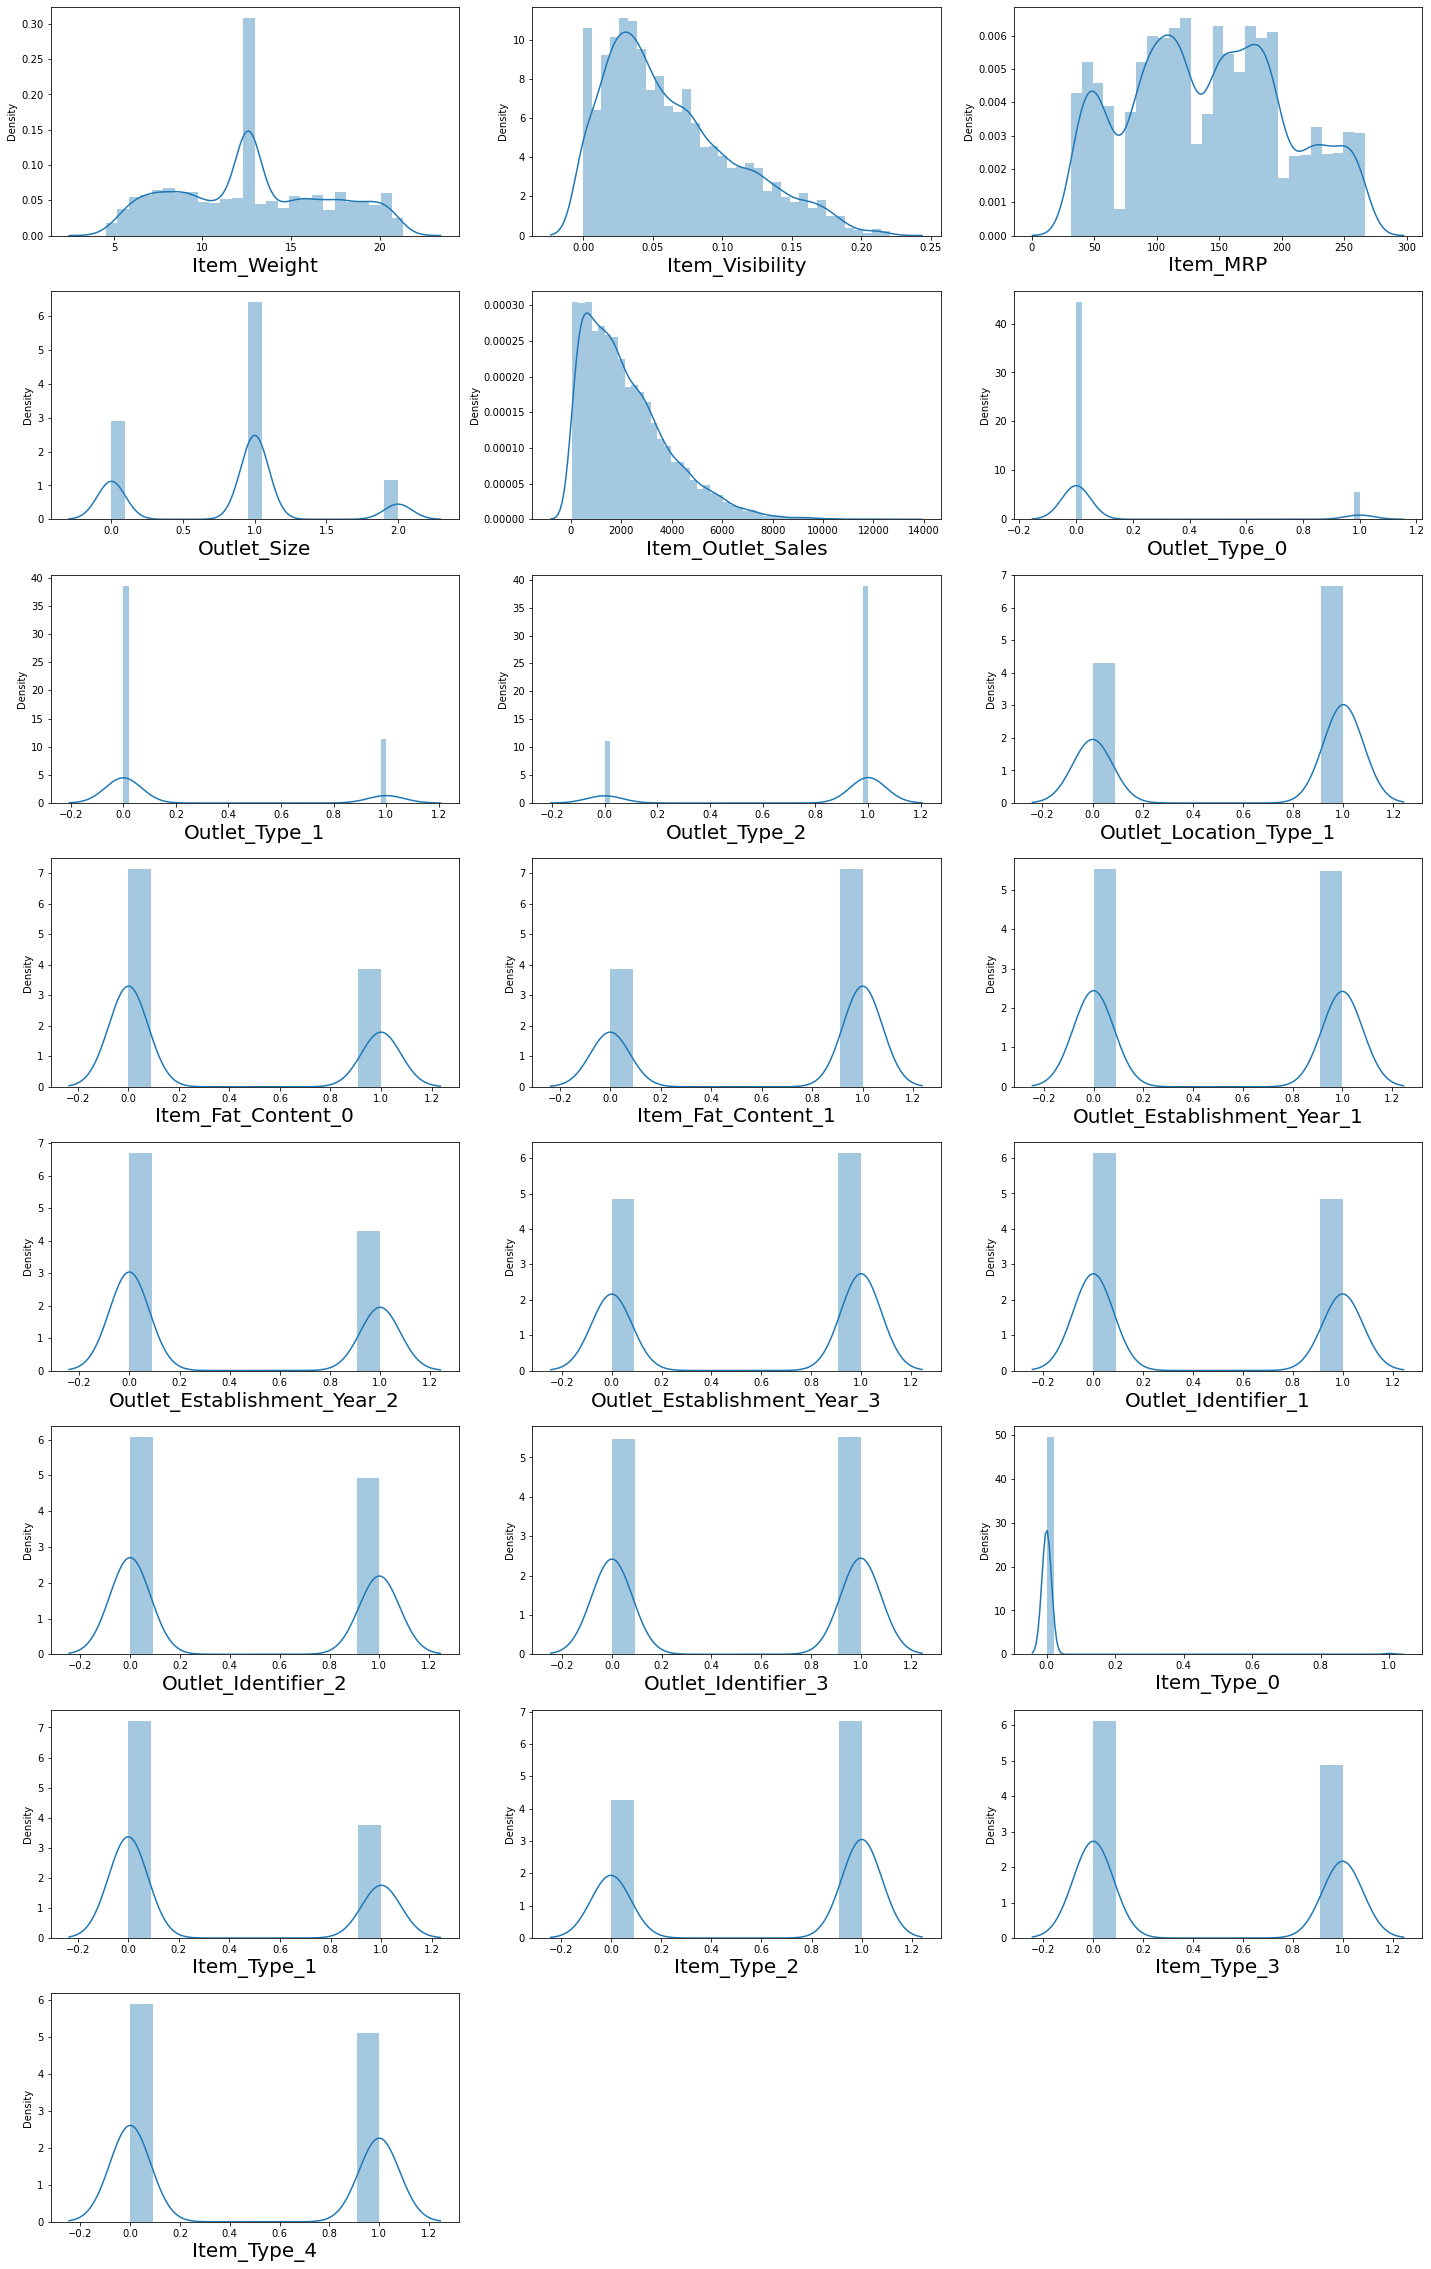

In [40]:
#Checking for skewness in the continuos data
plt.figure(figsize = (20,35))
pltnum = 1

for i in ds_new:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.distplot(ds_new[i])
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()

In [41]:
#Treating skewness greater than the range -0.5 to +0.5 in continuous data using power transformation technique

ds_new.skew()

Item_Weight                     0.120308
Item_Visibility                 0.795956
Item_MRP                        0.128945
Outlet_Size                     0.082879
Item_Outlet_Sales               1.173070
Outlet_Type_0                   2.478078
Outlet_Type_1                   1.301375
Outlet_Type_2                  -1.344733
Outlet_Location_Type_1         -0.440370
Item_Fat_Content_0              0.620786
Item_Fat_Content_1             -0.620786
Outlet_Establishment_Year_1     0.008070
Outlet_Establishment_Year_2     0.446491
Outlet_Establishment_Year_3    -0.236611
Outlet_Identifier_1             0.235157
Outlet_Identifier_2             0.211461
Outlet_Identifier_3            -0.009494
Item_Type_0                    11.628386
Item_Type_1                     0.663128
Item_Type_2                    -0.456720
Item_Type_3                     0.231766
Item_Type_4                     0.141814
dtype: float64

In [42]:
#Splitting data to apply transformation only on independent variable

x = train_data.drop(columns = 'Item_Outlet_Sales')
y = train_data['Item_Outlet_Sales']
tr_data = power_transform(x, method = 'yeo-johnson')
x = pd.DataFrame(tr_data, columns = x.columns)
x.skew()


Item_Weight                    -0.062510
Item_Visibility                 0.124279
Item_MRP                       -0.115386
Outlet_Size                    -0.073203
Outlet_Type_0                   2.498184
Outlet_Type_1                   1.244005
Outlet_Type_2                  -1.362080
Outlet_Location_Type_1         -0.437995
Item_Fat_Content_0              0.616705
Item_Fat_Content_1             -0.616705
Outlet_Establishment_Year_1     0.005398
Outlet_Establishment_Year_2     0.444044
Outlet_Establishment_Year_3    -0.256739
Outlet_Identifier_1             0.255296
Outlet_Identifier_2             0.186453
Outlet_Identifier_3            -0.006806
Item_Type_0                    11.411629
Item_Type_1                     0.665078
Item_Type_2                    -0.455163
Item_Type_3                     0.232739
Item_Type_4                     0.141407
dtype: float64

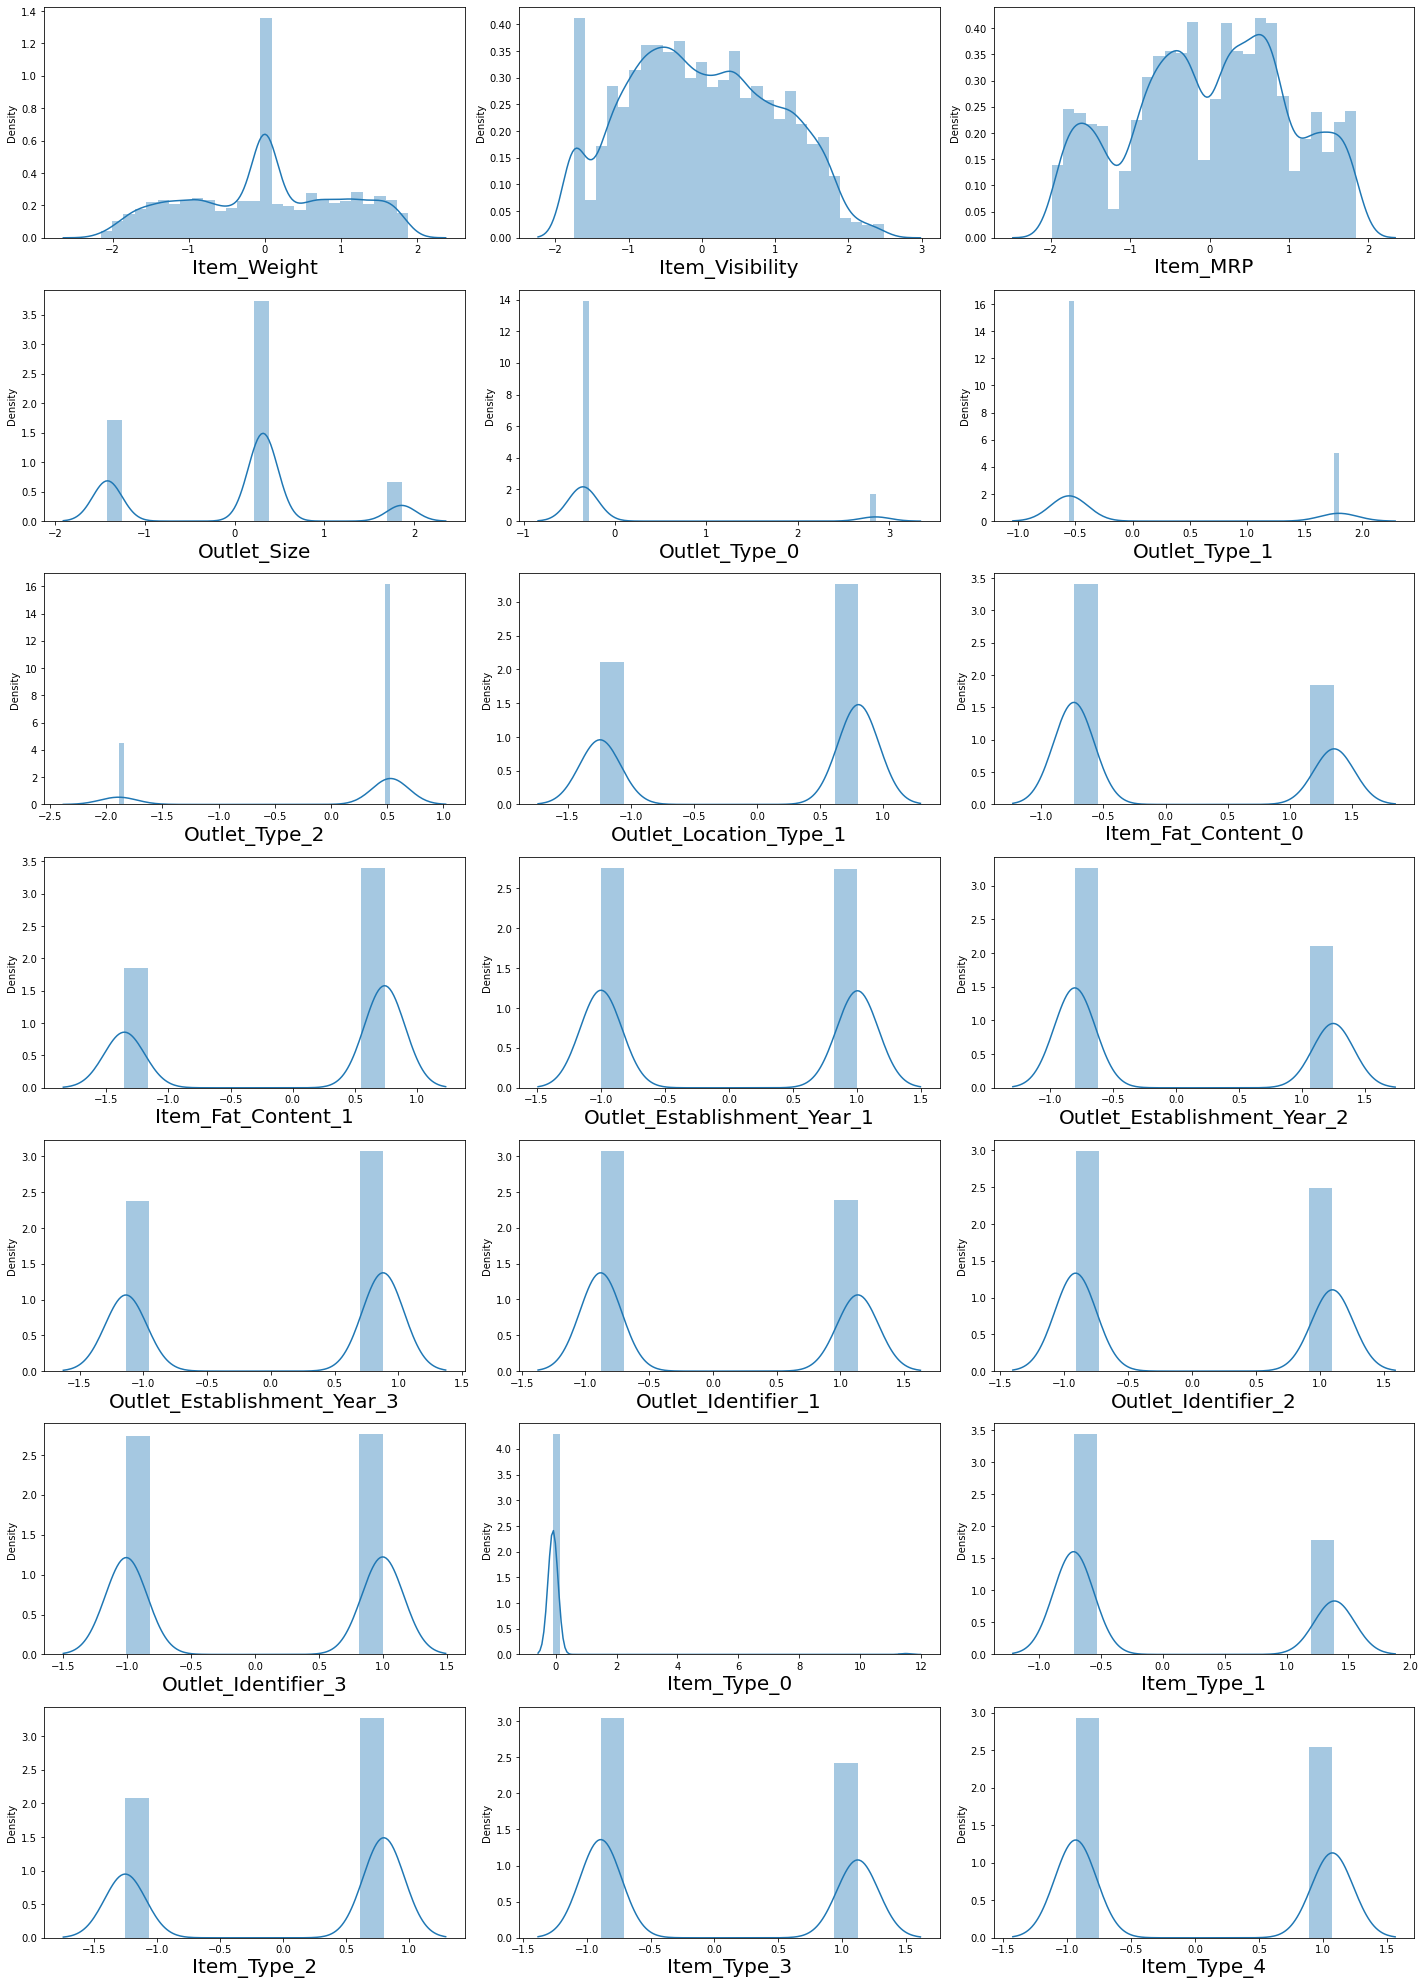

In [43]:
plt.figure(figsize = (20,35))
pltnum = 1

for i in x:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.distplot(x[i])
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()


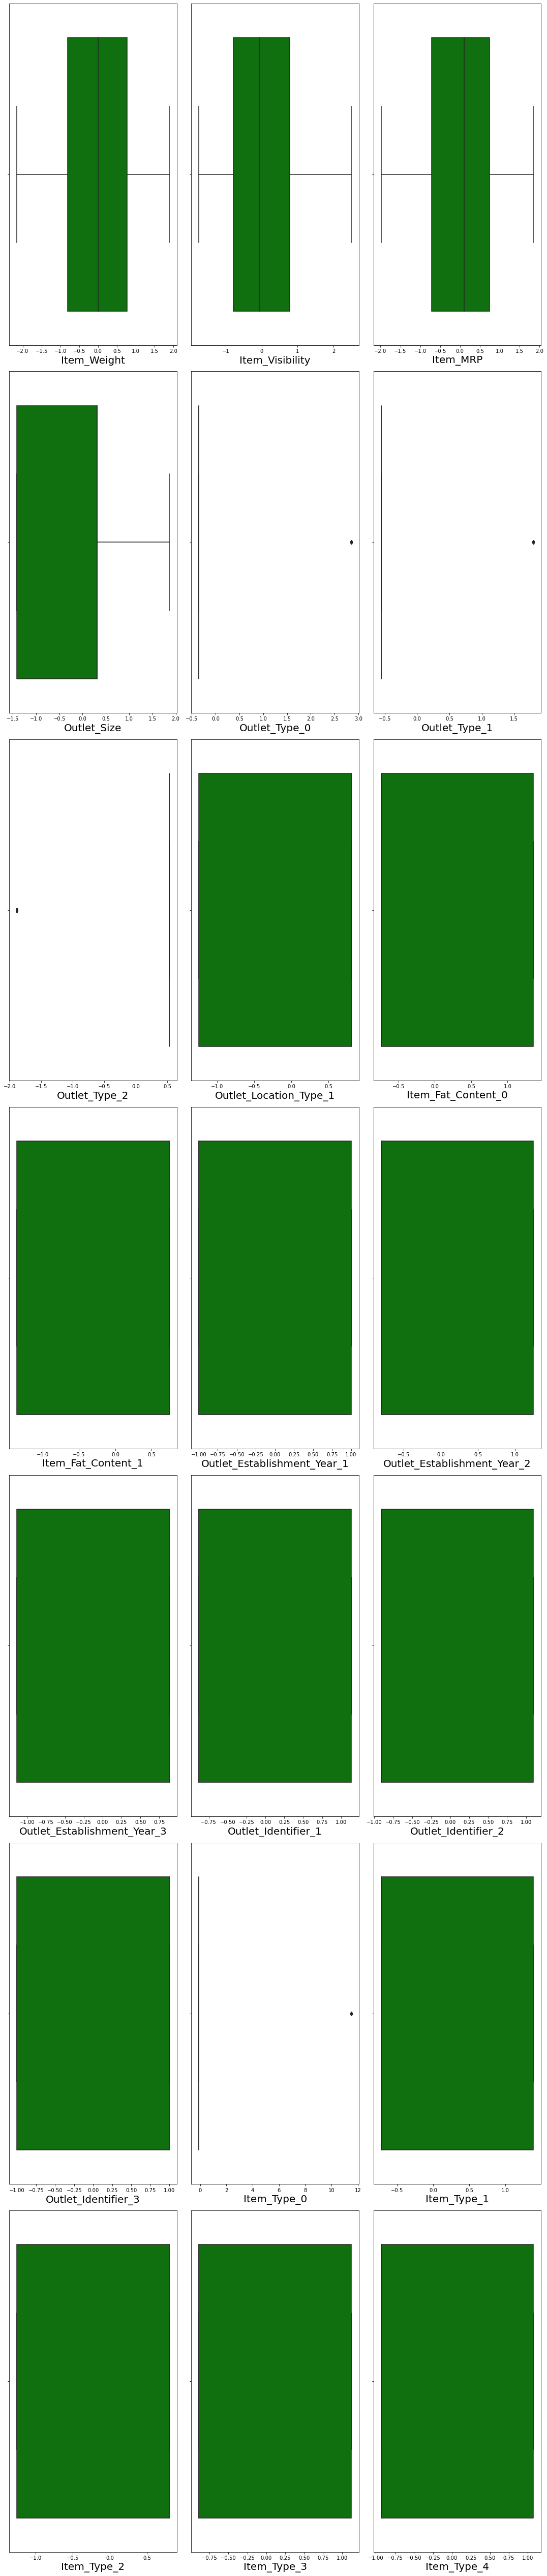

In [44]:
#The Skewness and outliers are under control, as per the given figures
plt.figure(figsize = (15,90))
pltnum = 1

for i in x:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.boxplot(x[i],color = 'green', orient = 'v')
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()

In [47]:
x

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Location_Type_1,Item_Fat_Content_0,Item_Fat_Content_1,...,Outlet_Establishment_Year_2,Outlet_Establishment_Year_3,Outlet_Identifier_1,Outlet_Identifier_2,Outlet_Identifier_3,Item_Type_0,Item_Type_1,Item_Type_2,Item_Type_3,Item_Type_4
0,-0.808889,-1.146886,1.623670,0.316693,-0.351028,-0.555711,0.528895,0.804732,-0.738147,0.738147,...,-0.802359,0.879856,-0.880486,-0.911125,0.996603,-0.086982,-0.721343,-1.253102,-0.890397,1.073187
1,-1.738575,-1.037100,-1.595016,0.316693,-0.351028,1.799497,-1.890735,-1.242650,1.354743,-1.354743,...,1.246325,-1.136550,-0.880486,1.097545,-1.003408,-0.086982,-0.721343,-1.253102,1.123095,-0.931804
2,1.094638,-1.122375,0.081237,0.316693,-0.351028,-0.555711,0.528895,0.804732,-0.738147,0.738147,...,-0.802359,0.879856,-0.880486,-0.911125,0.996603,-0.086982,-0.721343,-1.253102,1.123095,1.073187
3,1.449766,-1.745551,0.689968,0.316693,-0.351028,1.799497,0.528895,-1.242650,1.354743,-1.354743,...,1.246325,0.879856,-0.880486,1.097545,0.996603,-0.086982,-0.721343,0.798019,-0.890397,-0.931804
4,-0.905013,-1.745551,-1.476078,1.858218,-0.351028,-0.555711,0.528895,-1.242650,-0.738147,0.738147,...,-0.802359,-1.136550,1.135737,-0.911125,-1.003408,-0.086982,-0.721343,0.798019,-0.890397,1.073187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.465689,0.020310,1.148258,1.858218,-0.351028,-0.555711,0.528895,-1.242650,-0.738147,0.738147,...,-0.802359,-1.136550,1.135737,-0.911125,-1.003408,-0.086982,-0.721343,0.798019,1.123095,1.073187
8519,-1.050160,-0.221388,-0.463127,0.316693,-0.351028,-0.555711,0.528895,0.804732,1.354743,-1.354743,...,1.246325,-1.136550,1.135737,1.097545,-1.003408,-0.086982,-0.721343,0.798019,1.123095,-0.931804
8520,-0.479968,-0.542979,-0.867930,-1.415249,-0.351028,-0.555711,0.528895,0.804732,-0.738147,0.738147,...,-0.802359,0.879856,-0.880486,-0.911125,0.996603,-0.086982,1.386304,-1.253102,1.123095,-0.931804
8521,-1.368854,1.459990,-0.548996,0.316693,-0.351028,1.799497,-1.890735,-1.242650,1.354743,-1.354743,...,1.246325,-1.136550,-0.880486,1.097545,-1.003408,-0.086982,-0.721343,0.798019,1.123095,1.073187


In [48]:
"""
Item_Fat_Content_0             0.018719
Item_Weight                    0.009693
Item_Type_0                    0.007380
Outlet_Establishment_Year_4   -0.005184
Item_Type_1                   -0.018475
Item_Fat_Content_1            -0.018719
"""
x = x.drop(columns = ['Item_Weight','Item_Type_0','Item_Type_1','Item_Fat_Content_1','Item_Fat_Content_0'])

### Finding best random state

In [49]:
from sklearn.linear_model import LinearRegression
for i in range(1,3000):
    lr = LinearRegression()
    x_train,x_val,y_train,y_val = train_test_split(x,y,random_state = i)
    lr.fit(x_train,y_train)
    lr_pred = lr.predict(x_val)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_val,y_val)
    if round(tr_score*100,1)==round(ts_score*100,1):
        rs = i
print('The best random state is', rs)

The best random state is 2996


### Model 1 Linear Regression 

In [50]:
x_train,x_val,y_train,y_val = train_test_split(x,y,random_state = rs)
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_val)
lin_score = lin.score (x_val,y_val)
lin_score

0.5608805241502838

In [51]:
from sklearn.metrics import mean_squared_error
lin_rmse = np.sqrt(mean_squared_error(y_val,lin_pred))
lin_rmse

1147.7693041258717

### Model 2 Random Forest Regression 

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred =rfr.predict(x_val)
rfr_score = rfr.score(x_val,y_val)
rfr_score


0.556108384783708

In [53]:
rfr_rmse = np.sqrt(mean_squared_error(y_val,rfr_pred))
rfr_rmse

1153.9891537219528

### Model 3 Extra trees Regression

In [54]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_val)
et_score = et.score(x_val,y_val)
et_score

0.506491538362165

In [55]:
et_rmse = np.sqrt(mean_squared_error(y_val,et_pred))
et_rmse

1216.7757838474354

In [56]:
from sklearn.linear_model import Ridge, Lasso

In [57]:
#Ridge Regressor
ridge = Ridge()
ridge.fit(x_train,y_train)
rid_pred = ridge.predict(x_val)
rid_score = ridge.score (x_val,y_val)
rid_score

0.5617315028581382

In [58]:
rid_rmse = np.sqrt(mean_squared_error(y_val,rid_pred))
rid_rmse

1146.6566218638313

In [59]:
#lasso Regression
lasso = Lasso(max_iter = 1000)
lasso.fit(x_train,y_train)
las_pred = lasso.predict(x_val)
las_score = lasso.score (x_val,y_val)
las_score

0.5620066477548774

In [60]:
las_rmse = np.sqrt(mean_squared_error(y_val,las_pred))
las_rmse

1146.2966299266702

### using cross validation technique on each model

In [61]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(lin,x,y,scoring ='r2',cv=7)
cv =cv.mean()
cv

0.5601268992635028

In [62]:
cv1 = cross_val_score(rfr,x,y,scoring ='r2',cv=7)
cv1 =cv1.mean()
cv1

0.5577354721932285

In [63]:
cv2 = cross_val_score(et,x,y,scoring ='r2',cv=7)
cv2 =cv2.mean()
cv2

0.4902422933552438

In [64]:
cv3 = cross_val_score(ridge,x,y,scoring ='r2',cv=7)
cv3 =cv3.mean()
cv3

0.5601779086953903

In [65]:
cv4 = cross_val_score(lasso,x,y,scoring ='r2',cv=7)
cv4 =cv4.mean()
cv4

0.560214531569852

### Linear Regression is the best model and there is no hyper parameter tuning required hence finalizing the same model

In [66]:
mod = [lin_score,rfr_score,et_score,rid_score,las_score]
cv = [cv,cv1,cv2,cv3,cv4]
model = pd.DataFrame({})
model['mod'] = mod
model['cv'] =cv
model['best'] = model['mod'] - model['cv']
model

,mod,cv,best
0,0.560881,0.560127,0.000754
1,0.556108,0.557735,-0.001627
2,0.506492,0.490242,0.016249
3,0.561732,0.560178,0.001554
4,0.562007,0.560215,0.001792


### Saving the model

In [67]:
import joblib
joblib.dump(lin,'SalesMart.pkl')

['SalesMart.pkl']

## Fitting the test data and cleaing the data with same approach

In [68]:
ts_data['Item_Weight'] = ts_data['Item_Weight'].fillna(ts_data['Item_Weight'].median())
ts_data['Outlet_Size'] = ts_data['Outlet_Size'].fillna(ts_data['Outlet_Size'].mode()[0])

In [69]:
ts_data = ts_data.drop(columns = 'Item_Identifier')

In [70]:
ordin = OrdinalEncoder(categories = [['Small','Medium','High']])
ord_data = ordin.fit_transform(ts_data[['Outlet_Size']])
ts_data['Outlet_Size'] = ord_data

In [71]:
ts_data['Item_Fat_Content'] = np.where(ts_data['Item_Fat_Content'].isin(['low fat','LF']),'Low Fat',
                                      np.where(ts_data['Item_Fat_Content']== 'reg','Regular',ts_data['Item_Fat_Content']))

In [72]:
ts_data['Outlet_Establishment_Year'] = ts_data['Outlet_Establishment_Year'].astype(str)

In [73]:
en_test_data = be.fit_transform(ts_data[['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type']],)

In [74]:
test_data = pd.DataFrame(en_test_data)

In [75]:
ts_data = ts_data.drop(columns =['Outlet_Type','Outlet_Location_Type',
                                        'Item_Fat_Content','Outlet_Establishment_Year','Outlet_Identifier','Item_Type'])

In [76]:
test_data = pd.concat([ts_data,test_data],axis = 1)

In [77]:
test_data = test_data.drop(columns =['Outlet_Location_Type_0','Outlet_Establishment_Year_0','Outlet_Identifier_0'])

In [78]:
from scipy.stats import zscore
zt = np.abs(zscore(test_data[['Item_Visibility']]))
zt

array([[1.13407715],
       [0.53185019],
       [0.6613164 ],
       ...,
       [0.15307374],
       [1.28168987],
       [0.76171558]])

In [79]:
ts_new = test_data[(zt<3).all(axis =1)]
print(ts_new.shape)
print(test_data.shape)

(5600, 21)
(5681, 21)


In [80]:
ts_new.dtypes

Item_Weight                    float64
Item_Visibility                float64
Item_MRP                       float64
Outlet_Size                    float64
Outlet_Type_0                    int64
Outlet_Type_1                    int64
Outlet_Type_2                    int64
Outlet_Location_Type_1           int64
Item_Fat_Content_0               int64
Item_Fat_Content_1               int64
Outlet_Establishment_Year_1      int64
Outlet_Establishment_Year_2      int64
Outlet_Establishment_Year_3      int64
Outlet_Identifier_1              int64
Outlet_Identifier_2              int64
Outlet_Identifier_3              int64
Item_Type_0                      int64
Item_Type_1                      int64
Item_Type_2                      int64
Item_Type_3                      int64
Item_Type_4                      int64
dtype: object

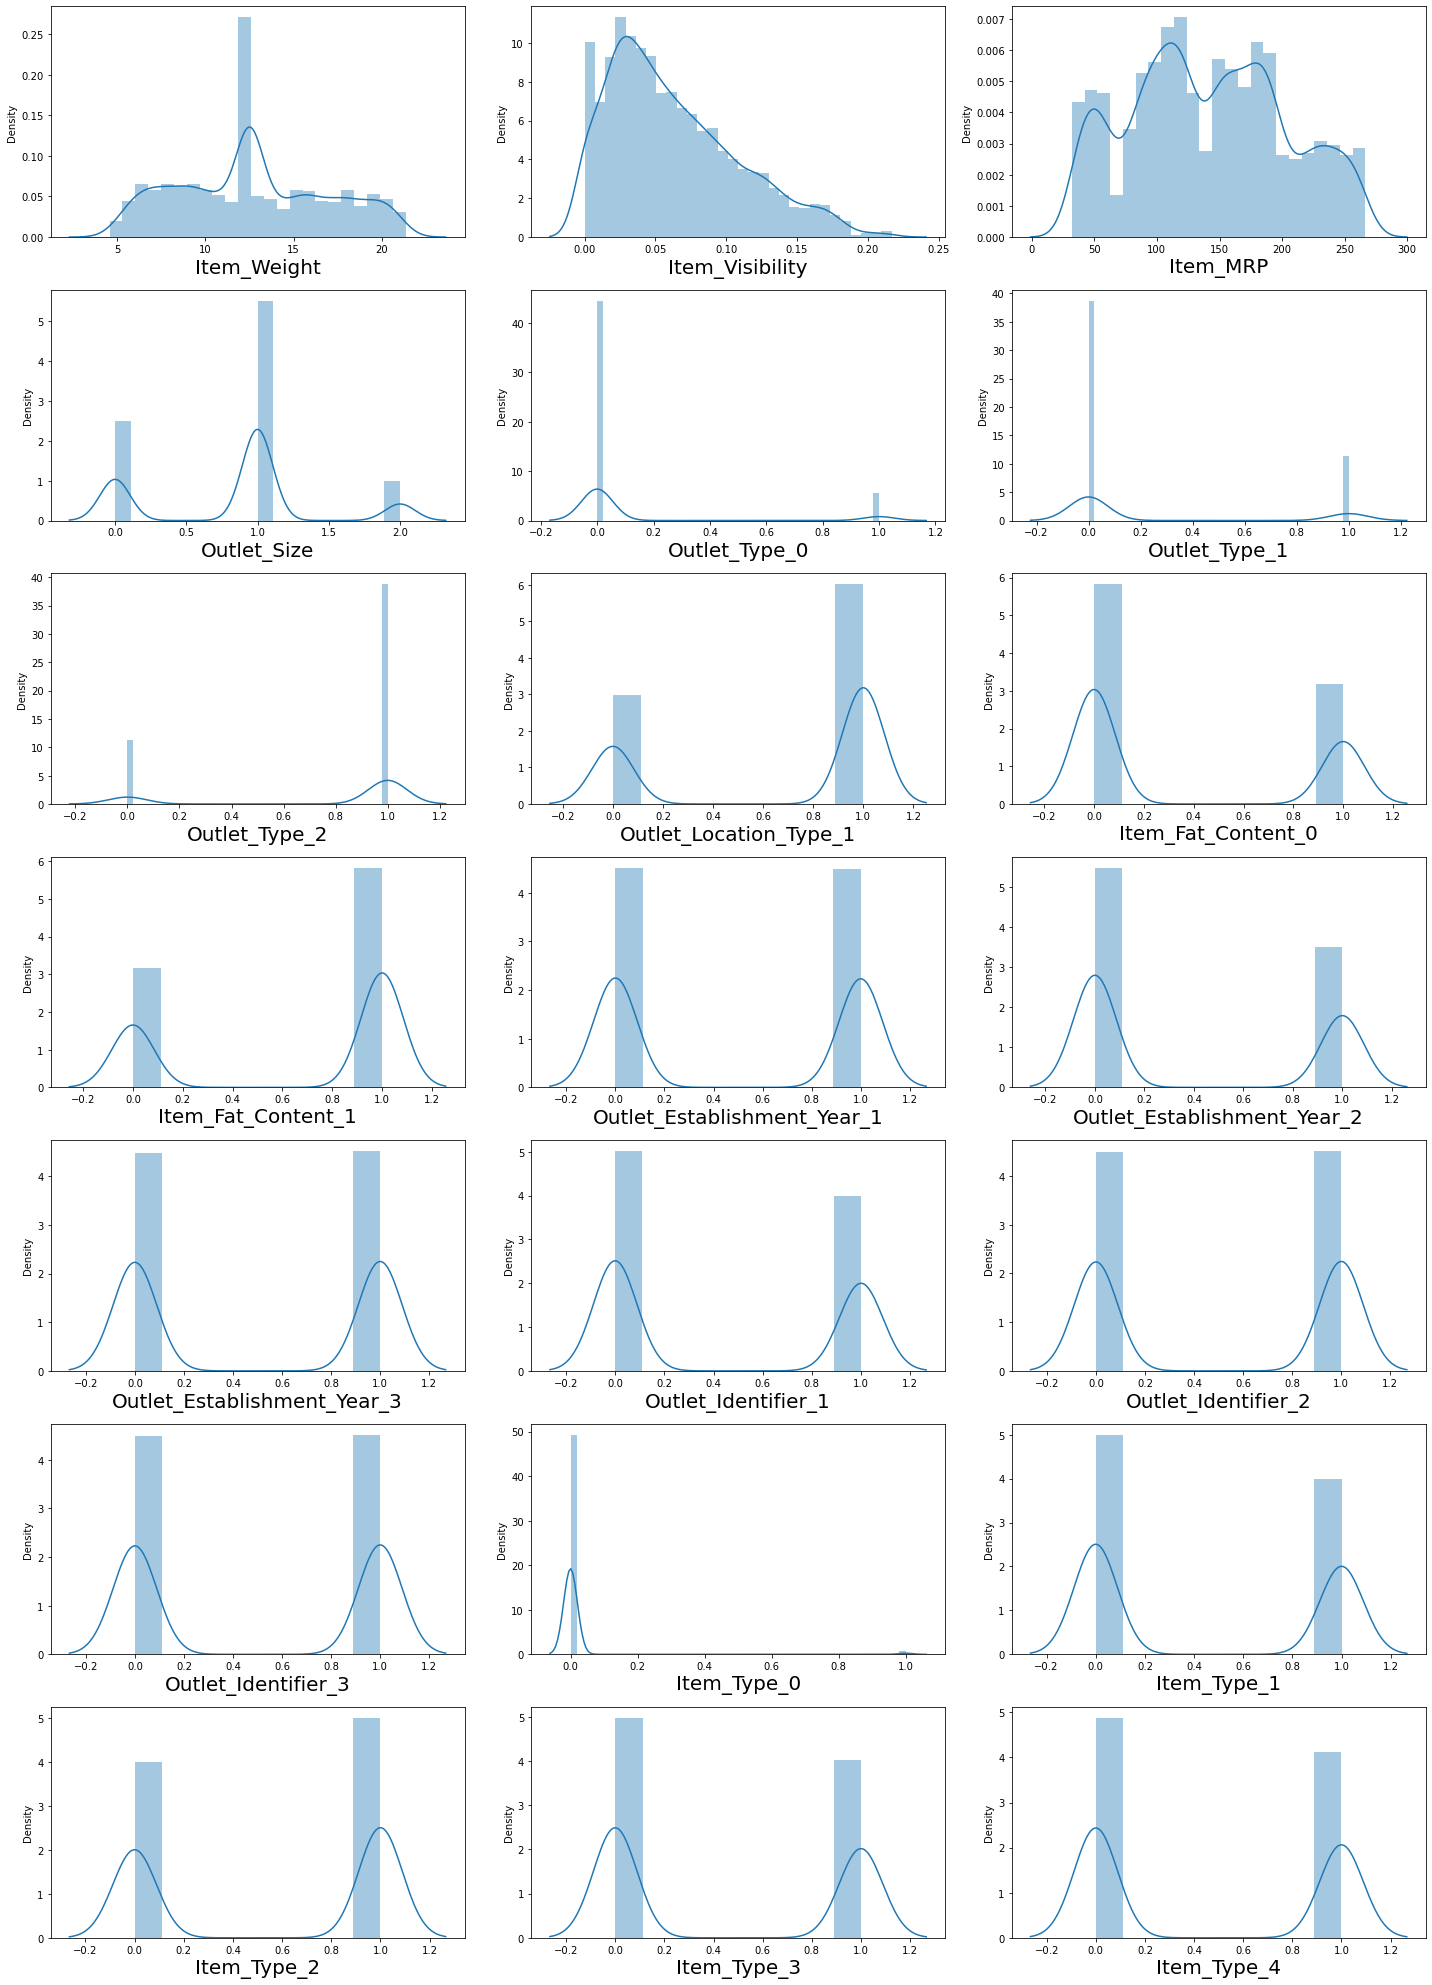

In [81]:
plt.figure(figsize = (20,35))
pltnum = 1

for i in ts_new:
    if pltnum <= 27:
        plt.subplot(9,3,pltnum)
        sns.distplot(ts_new[i])
        plt.xlabel(i,fontsize = 20)
    pltnum+=1
plt.tight_layout()

In [82]:
ts_new.skew()

Item_Weight                    0.163767
Item_Visibility                0.787861
Item_MRP                       0.133061
Outlet_Size                    0.082542
Outlet_Type_0                  2.487740
Outlet_Type_1                  1.311339
Outlet_Type_2                 -1.318685
Outlet_Location_Type_1        -0.716410
Item_Fat_Content_0             0.616007
Item_Fat_Content_1            -0.616007
Outlet_Establishment_Year_1    0.007145
Outlet_Establishment_Year_2    0.449633
Outlet_Establishment_Year_3   -0.007859
Outlet_Identifier_1            0.229412
Outlet_Identifier_2           -0.004287
Outlet_Identifier_3           -0.008574
Item_Type_0                    8.468687
Item_Type_1                    0.224314
Item_Type_2                   -0.223586
Item_Type_3                    0.210497
Item_Type_4                    0.166331
dtype: float64

In [83]:
tr_ts_data = power_transform(ts_new, method = 'yeo-johnson')
x_test = pd.DataFrame(tr_ts_data, columns = ts_new.columns)

In [85]:
x_test = x_test.drop(columns = ['Item_Weight','Item_Type_0','Item_Type_1','Item_Fat_Content_1','Item_Fat_Content_0'])

In [86]:
fnl_pred = lin.predict(x_test)